<h1><center><font color='red'> Preprocessing :</font> </center><h1>

**<font color='blue'>Dans Scikit-learn il y a 5 class d'encodage :</font>** 

-`LabelEncoder`: il fonctionne pour une seule colonne

-`LabelBinarizer`

-`MultiLabelBinazer`

-`OneHotEncoder`

-`OrdinalEncoder` : peut fonctionner sur plusieurs colonnes avec le m principe que LabelEncoder

## <font color='green'> LabelEncoder & OrdinalEncoder : </font>

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
X=np.array(['Chat','Chien','Chat','Oiseau'])

In [5]:
transformer = LabelEncoder()
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

`inverse_transform`nous permet de décoder les données

In [6]:
transformer.inverse_transform(np.array([1,0,0,2]))

array(['Chien', 'Chat', 'Chat', 'Oiseau'], dtype='<U6')

## <font color='green'> LabelBinarizer : </font>

In [7]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt 

In [8]:
y=np.array(['Chat','Chien','Chat','Oiseau'])

In [11]:
encoder=LabelBinarizer(sparse_output=True)

In [12]:
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
X=np.array([['chat','poils'],
          ['chien','poils'],
          ['chat','poils'],
          ['oiseau','plumes']])

In [16]:
encoder=OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

##  <font color='green'> Normalisation : </font>

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X=np.array([[70],[80],[120]])

In [19]:
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [20]:
scaler.inverse_transform(np.array([[0.3],[0.1]]))

array([[85.],
       [75.]])

## <font color='green'> Application : </font>

In [21]:
from sklearn.datasets import load_iris

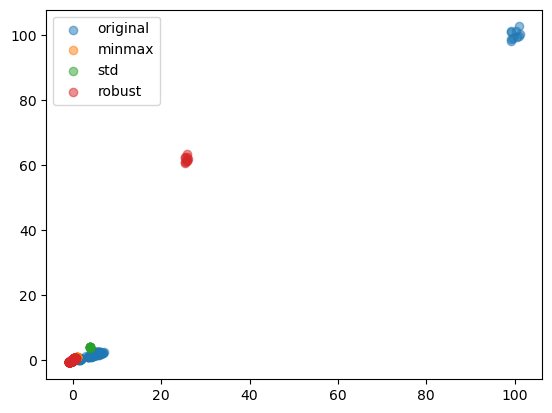

In [32]:
iris=load_iris()
outliers=np.full((10,4),100)+np.random.randn(10,4)

X=iris.data
X=np.vstack((X,outliers))
X_minmax=MinMaxScaler().fit_transform(X)
X_std=StandardScaler().fit_transform(X)
X_robust=RobustScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3],alpha=0.5,label='original')
plt.scatter(X_minmax[:,2],X_minmax[:,3],alpha=0.5,label='minmax')
plt.scatter(X_std[:,2],X_std[:,3],alpha=0.5,label='std')
plt.scatter(X_robust[:,2],X_robust[:,3],alpha=0.5,label='robust')
plt.legend()
plt.show()

## <font color='green'> StandardScaler : </font>

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X=np.array([[70],[80],[120]])
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

<font color='red'> *Attention :* </font> Eviter StandardScaler et MinMaxScaler à la présence des outliers.

## <font color='green'> RobustScaler :</font>

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
X=np.array([[70],[80],[120]])
scaler=RobustScaler()
scaler.fit_transform(X)

array([[-0.4],
       [ 0. ],
       [ 1.6]])

## <font color='green'> PolynomialFeatures :</font>

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
X=np.array([[1],[2],[0.5]])
PolynomialFeatures(3).fit_transform(X) #X**0,X**1,X**2,X**3

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

## <font color='green'> Application :</font>

In [36]:
from sklearn.linear_model import LinearRegression

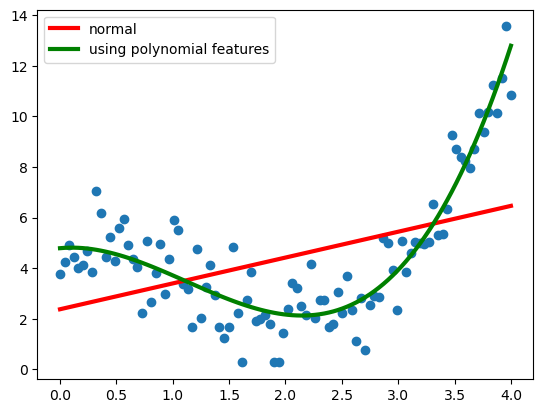

In [40]:
x=np.linspace(0,4,100).reshape((100,1))
y=x**2+5*np.cos(x)+np.random.randn(100,1)

plt.scatter(x,y)
X_poly=PolynomialFeatures(3).fit_transform(x)

model=LinearRegression().fit(x,y)
model2=LinearRegression().fit(X_poly,y)
y_pred=model.predict(x)
y_pred2=model2.predict(X_poly)
plt.plot(x,y_pred,c='r',lw=3,label='normal')
plt.plot(x,y_pred2,c='g',lw=3,label='using polynomial features')
plt.legend()
plt.show()

## <font color='green'> Pipeline :</font>

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [43]:
iris=load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y)


In [44]:
#Transformer 
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)

#Estimator
model=SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

#Test
X_test_transformed=scaler.fit_transform(X_test)
model.predict(X_test_transformed)


array([1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2])

La manière simple est d'utiliser pipeline

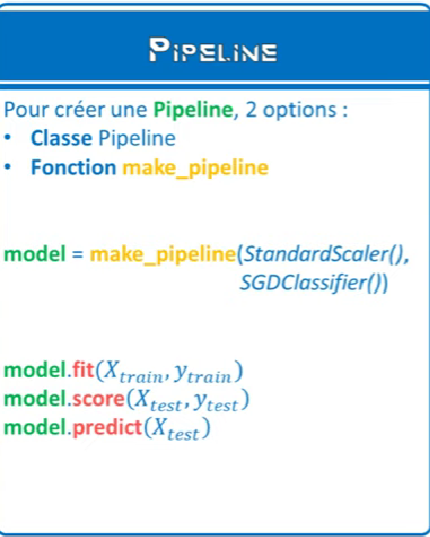

In [45]:
from sklearn.pipeline import make_pipeline

In [46]:
model=make_pipeline(StandardScaler(),SGDClassifier())
model.fit(X_train,y_train)
model.predict(X_test)

array([1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2])

## <font color='green'> Pipeline Avancée :</font>

In [47]:
import seaborn as sns

In [48]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:

y=titanic['survived']
X=titanic.drop('survived',axis=1)

**<font color='red'> Alert :</font>** On a des colonnes où il y des valeurs numériques et autres il y a des 'string'. Dcp, on ne peut pas utilisé (par exemple) StandardScaler sur toute la Data.

## <font color='blue'> Column_transformer </font>

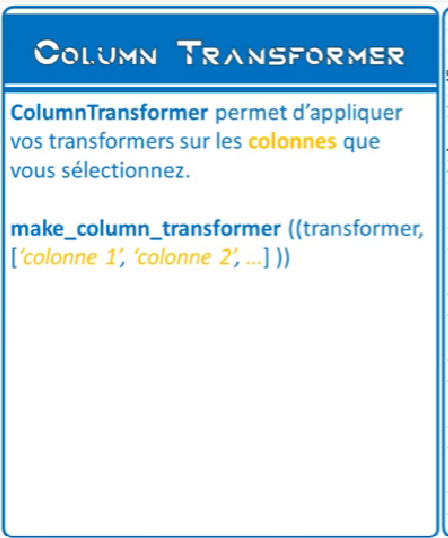

In [73]:
from sklearn.compose import make_column_transformer

In [74]:
transformer=make_column_transformer((StandardScaler(),['age','fare']))

In [75]:
transformer.fit_transform(X) #il va traiter que les deux colonnes 'age' et 'fare'

array([[ 1.52081957e-01, -1.00110129e-01],
       [-3.98750185e-02, -3.38484771e-01],
       [ 1.17585249e+00, -3.54707823e-01],
       [-2.02343043e+00, -8.15671915e-01],
       [ 1.43179512e+00, -6.86542977e-01],
       [-1.03860677e-01, -8.64177202e-01],
       [-4.87774627e-01, -5.69212621e-01],
       [-1.06364555e+00,  2.41320703e+00],
       [ 8.55924198e-01, -2.87169016e-02],
       [ 1.87969473e+00, -2.22082571e-01],
       [ 5.99981565e-01,  5.97174125e-02],
       [-4.23788969e-01, -8.96951044e-01],
       [-6.79731602e-01, -9.34313224e-01],
       [-8.07702919e-01,  2.41320703e+00],
       [ 6.63967223e-01, -2.32625261e-01],
       [ 2.26360868e+00, -5.80300668e-01],
       [-8.07702919e-01, -2.04003209e-01],
       [-9.35674235e-01, -2.13978472e-02],
       [ 7.27952882e-01, -3.52905262e-01],
       [-7.43717260e-01,  2.21028188e+00],
       [-1.99839164e-01, -8.64177202e-01],
       [ 1.17585249e+00, -2.13978472e-02],
       [-1.06364555e+00, -6.90039290e-01],
       [ 8.

In [76]:
model=make_pipeline(transformer,SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fare'])])),
                ('sgdclassifier', SGDClassifier())])

Pour créer une pipeline un peu plus riche et complexe, on va trier les colonnes de type numérique et catégorical.

In [77]:
numerical_features=['pclass','age','fare']
categorical_features=['sex','deck','alone']

In [78]:
from sklearn.impute import SimpleImputer
numerical_pipeline=make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
#SimpleImputer pour remplacer les valeurs maquantes

In [79]:
preprocessor=make_column_transformer((numerical_pipeline,numerical_features),
                                    (categorical_pipeline,categorical_features))


In [80]:
model=make_pipeline(preprocessor,SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  

Il y a une nouvelle methode plus sofistiquée, make column selector

## <font color='blue'> Column_selector </font>

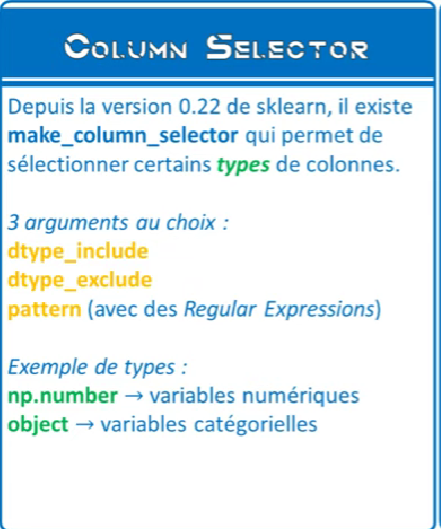

In [81]:
from sklearn.compose import make_column_selector

In [82]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [83]:
preprocessor=make_column_transformer((numerical_pipeline,numerical_features),
                                    (categorical_pipeline,categorical_features))
model=make_pipeline(preprocessor,SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E77FEA57C0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

## <font color='blue'> make_union : </font>

In [87]:
from sklearn.pipeline import make_union
from sklearn.preprocessing import Binarizer

In [85]:
numerical_features=X[['age','fare']]

In [88]:
pipeline=make_union(StandardScaler(),Binarizer())

In [91]:
pipeline.fit_transform(numerical_features).shape 
# il va nous rendre 4 colonnes (2 pour std) & (2 pour binarizer)

(182, 4)